<a href="https://colab.research.google.com/github/Reet1992/Disease_prediction_for_ghumamua/blob/main/prediction_EDA_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HEART DISEASE PREDICTION**

This is a dataset on which I have performed a simple classification model to predict the heart disease with a proof of Exploratory Data Analysis. This part consists simple Data wrangling, null value replacement, Data manipulation and simple form of machine learning model( classifiers ). The exploratory data analysis ( EDA ) tells us the pattern for the important features which are directly correlated with **AGE, BMI**( these two are extremely important attributes ]) and the Label ( **Stroke** ).

These are the following steps on which the document should be studied.

1. Data manipulation on Important Features and perform EDA ( Done )
2. Implement simple Machine learning model ( Done )
3. Clustering of patients based on their health behavior and medical history. (**In progress**)




In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv')

In [5]:
df2 = df 

In [7]:
### Data Transformation 

### Labelencoder


from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df2['smoking_status'] = labelencoder.fit_transform(df2['smoking_status'])
df2['work_type'] = labelencoder.fit_transform(df2['work_type'])
df2['Residence_type'] = labelencoder.fit_transform(df2['Residence_type'])
df2['ever_married'] = labelencoder.fit_transform(df2['ever_married'])


In [8]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,Female,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,Male,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,Female,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,Female,79.0,1,0,1,3,0,174.12,24.0,2,1


In [9]:
df2.corr()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.003084,0.014074,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.333398,0.265199,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.167811,0.111038,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.041357,0.048460,0.134914
ever_married,0.013690,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.341695,0.259647,0.108340
work_type,-0.015757,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.304876,-0.305927,-0.032316
Residence_type,-0.001403,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000122,0.008237,0.015458
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.175502,0.063437,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,0.014074,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.224473,1.000000,0.028123


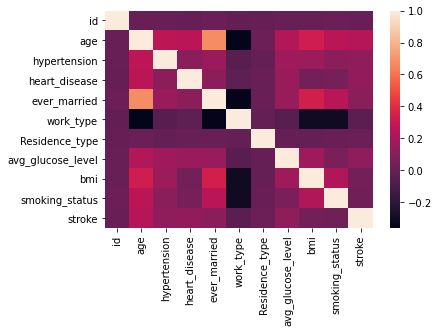

In [10]:
sns.heatmap(df2.corr())

In [14]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

x1 = df2[['age','heart_disease','ever_married','avg_glucose_level']]
x1 = x1.values
print(x1)

[[ 67.     1.     1.   228.69]
 [ 61.     0.     1.   202.21]
 [ 80.     1.     1.   105.92]
 ...
 [ 35.     0.     1.    82.99]
 [ 51.     0.     1.   166.29]
 [ 44.     0.     1.    85.28]]


In [16]:
y1 = df2[['stroke']]
y1 = y1.values
y1

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Accuracy: 0.9387222946544981
Precision [0.94240838 0.        ]
Recall [0.99585062 0.        ]


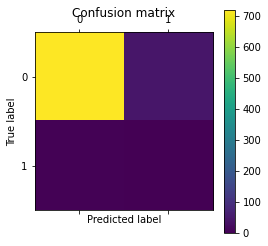

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.15, random_state=1)

clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=20)
from sklearn import tree

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test, y_pred, average=None))
print("Recall",metrics.recall_score(y_test, y_pred, average=None))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<class 'pydotplus.graphviz.Dot'>


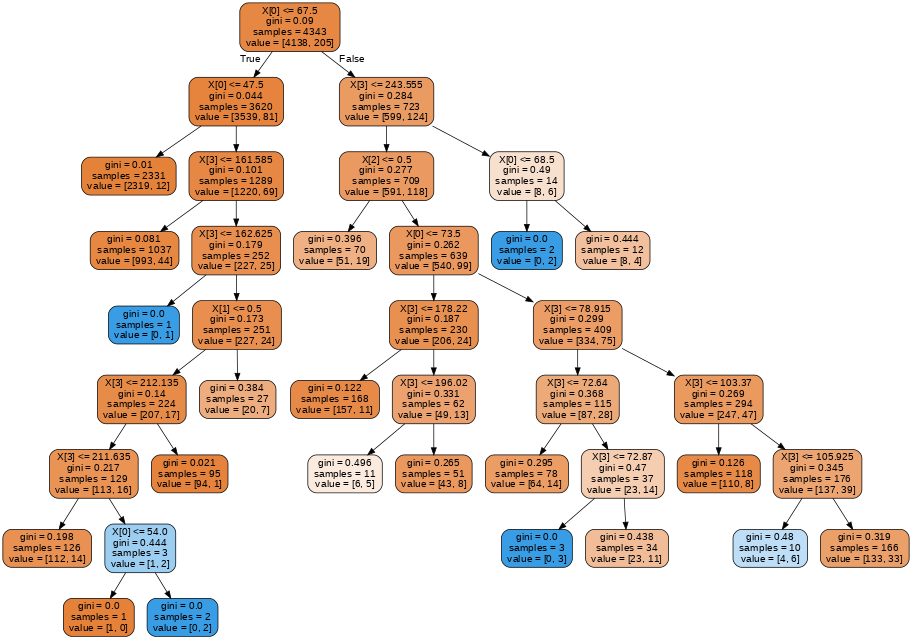

In [20]:


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus
dot_data = StringIO()

from IPython.display import Image 
export_graphviz(clf,out_file=dot_data,filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

print(type(graph))

graph.set_size('"9.5,9.5!"')
Image(graph.create_png())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9426336375488917
Precision [0.94263364 0.        ]
Recall [1. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


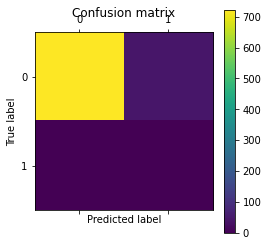

In [24]:
### RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=None, max_leaf_nodes=20)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test, y_pred, average=None))
print("Recall",metrics.recall_score(y_test, y_pred, average=None))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,Female,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,Male,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,Female,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,Female,79.0,1,0,1,3,0,174.12,24.0,2,1


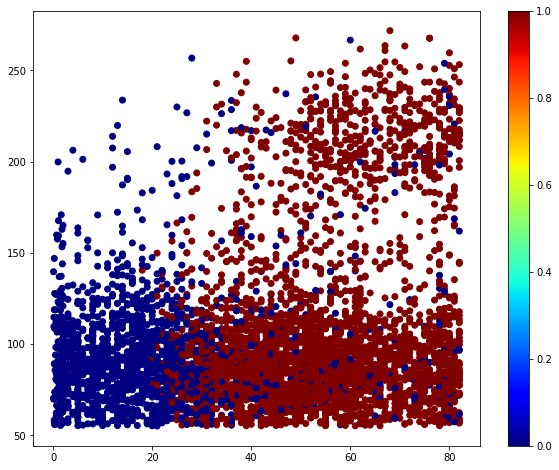

In [39]:
plt.figure(figsize=(10, 8)) 

### Scatterplot for AGE VS Average Glucose Level

plt.scatter(df2['age'], df2['avg_glucose_level'],cmap=plt.get_cmap("jet"),
            c = df2['ever_married'])
plt.colorbar()
plt.show()

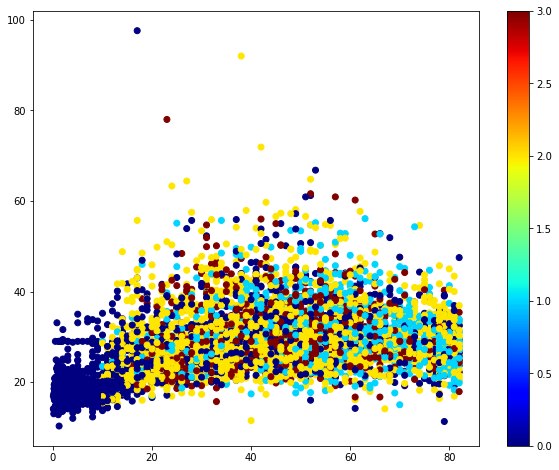

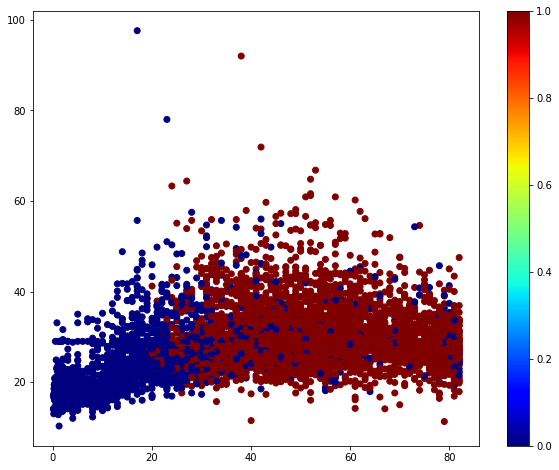

In [40]:
plt.figure(figsize=(10, 8)) 

### Scatterplot for AGE VS Average bmi

plt.scatter(df2['age'], df2['bmi'],cmap=plt.get_cmap("jet"),
            c = df2['smoking_status'])
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 8)) 

### Scatterplot for AGE VS Average bmi

plt.scatter(df2['age'], df2['bmi'],cmap=plt.get_cmap("jet"),
            c = df2['ever_married'])
plt.colorbar()
plt.show()

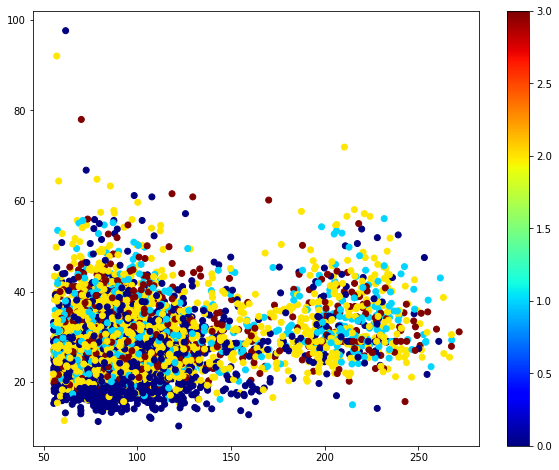

In [37]:
plt.figure(figsize=(10, 8)) 

### Scatterplot for average_glucose_level VS Average bmi

plt.scatter(df2['avg_glucose_level'], df2['bmi'],cmap=plt.get_cmap("jet"),
            c = df2['smoking_status'])
plt.colorbar()
plt.show()

(array([175., 145., 114., 109., 102., 151., 170., 106., 164., 174., 160.,
        150., 179., 200., 218., 141., 222., 220., 169., 262., 255., 220.,
        150., 189., 156., 160.,  91., 143., 229., 186.]),
 array([8.00000000e-02, 2.81066667e+00, 5.54133333e+00, 8.27200000e+00,
        1.10026667e+01, 1.37333333e+01, 1.64640000e+01, 1.91946667e+01,
        2.19253333e+01, 2.46560000e+01, 2.73866667e+01, 3.01173333e+01,
        3.28480000e+01, 3.55786667e+01, 3.83093333e+01, 4.10400000e+01,
        4.37706667e+01, 4.65013333e+01, 4.92320000e+01, 5.19626667e+01,
        5.46933333e+01, 5.74240000e+01, 6.01546667e+01, 6.28853333e+01,
        6.56160000e+01, 6.83466667e+01, 7.10773333e+01, 7.38080000e+01,
        7.65386667e+01, 7.92693333e+01, 8.20000000e+01]),
 <a list of 30 Patch objects>)

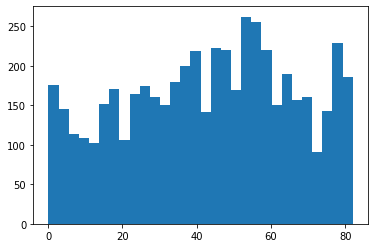

In [30]:
### Distrituion of AGE

plt.hist(df2['age'],bins = 30)


In [31]:
#### Distribution of BMI

df2['bmi'].isna()

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [32]:
df2['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [33]:
df2['bmi'] = df2['bmi'].replace(np.nan, 29)

[[67.   1.   1.  ... 36.6  1.   1. ]
 [61.   0.   1.  ... 29.   0.   0. ]
 [80.   1.   1.  ... 32.5  1.   0. ]
 ...
 [35.   0.   1.  ... 30.6  0.   0. ]
 [51.   0.   1.  ... 25.6  0.   0. ]
 [44.   0.   1.  ... 26.2  0.   1. ]]
Accuracy: 0.9387222946544981
Precision [0.94591029 0.33333333]
Recall [0.99170124 0.06818182]


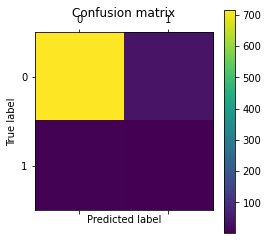

In [34]:
x1 = df2[['age','heart_disease','ever_married','avg_glucose_level','bmi','heart_disease','Residence_type']]
x1 = x1.values
print(x1)

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.15, random_state=1)

clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=20)
from sklearn import tree

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test, y_pred, average=None))
print("Recall",metrics.recall_score(y_test, y_pred, average=None))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

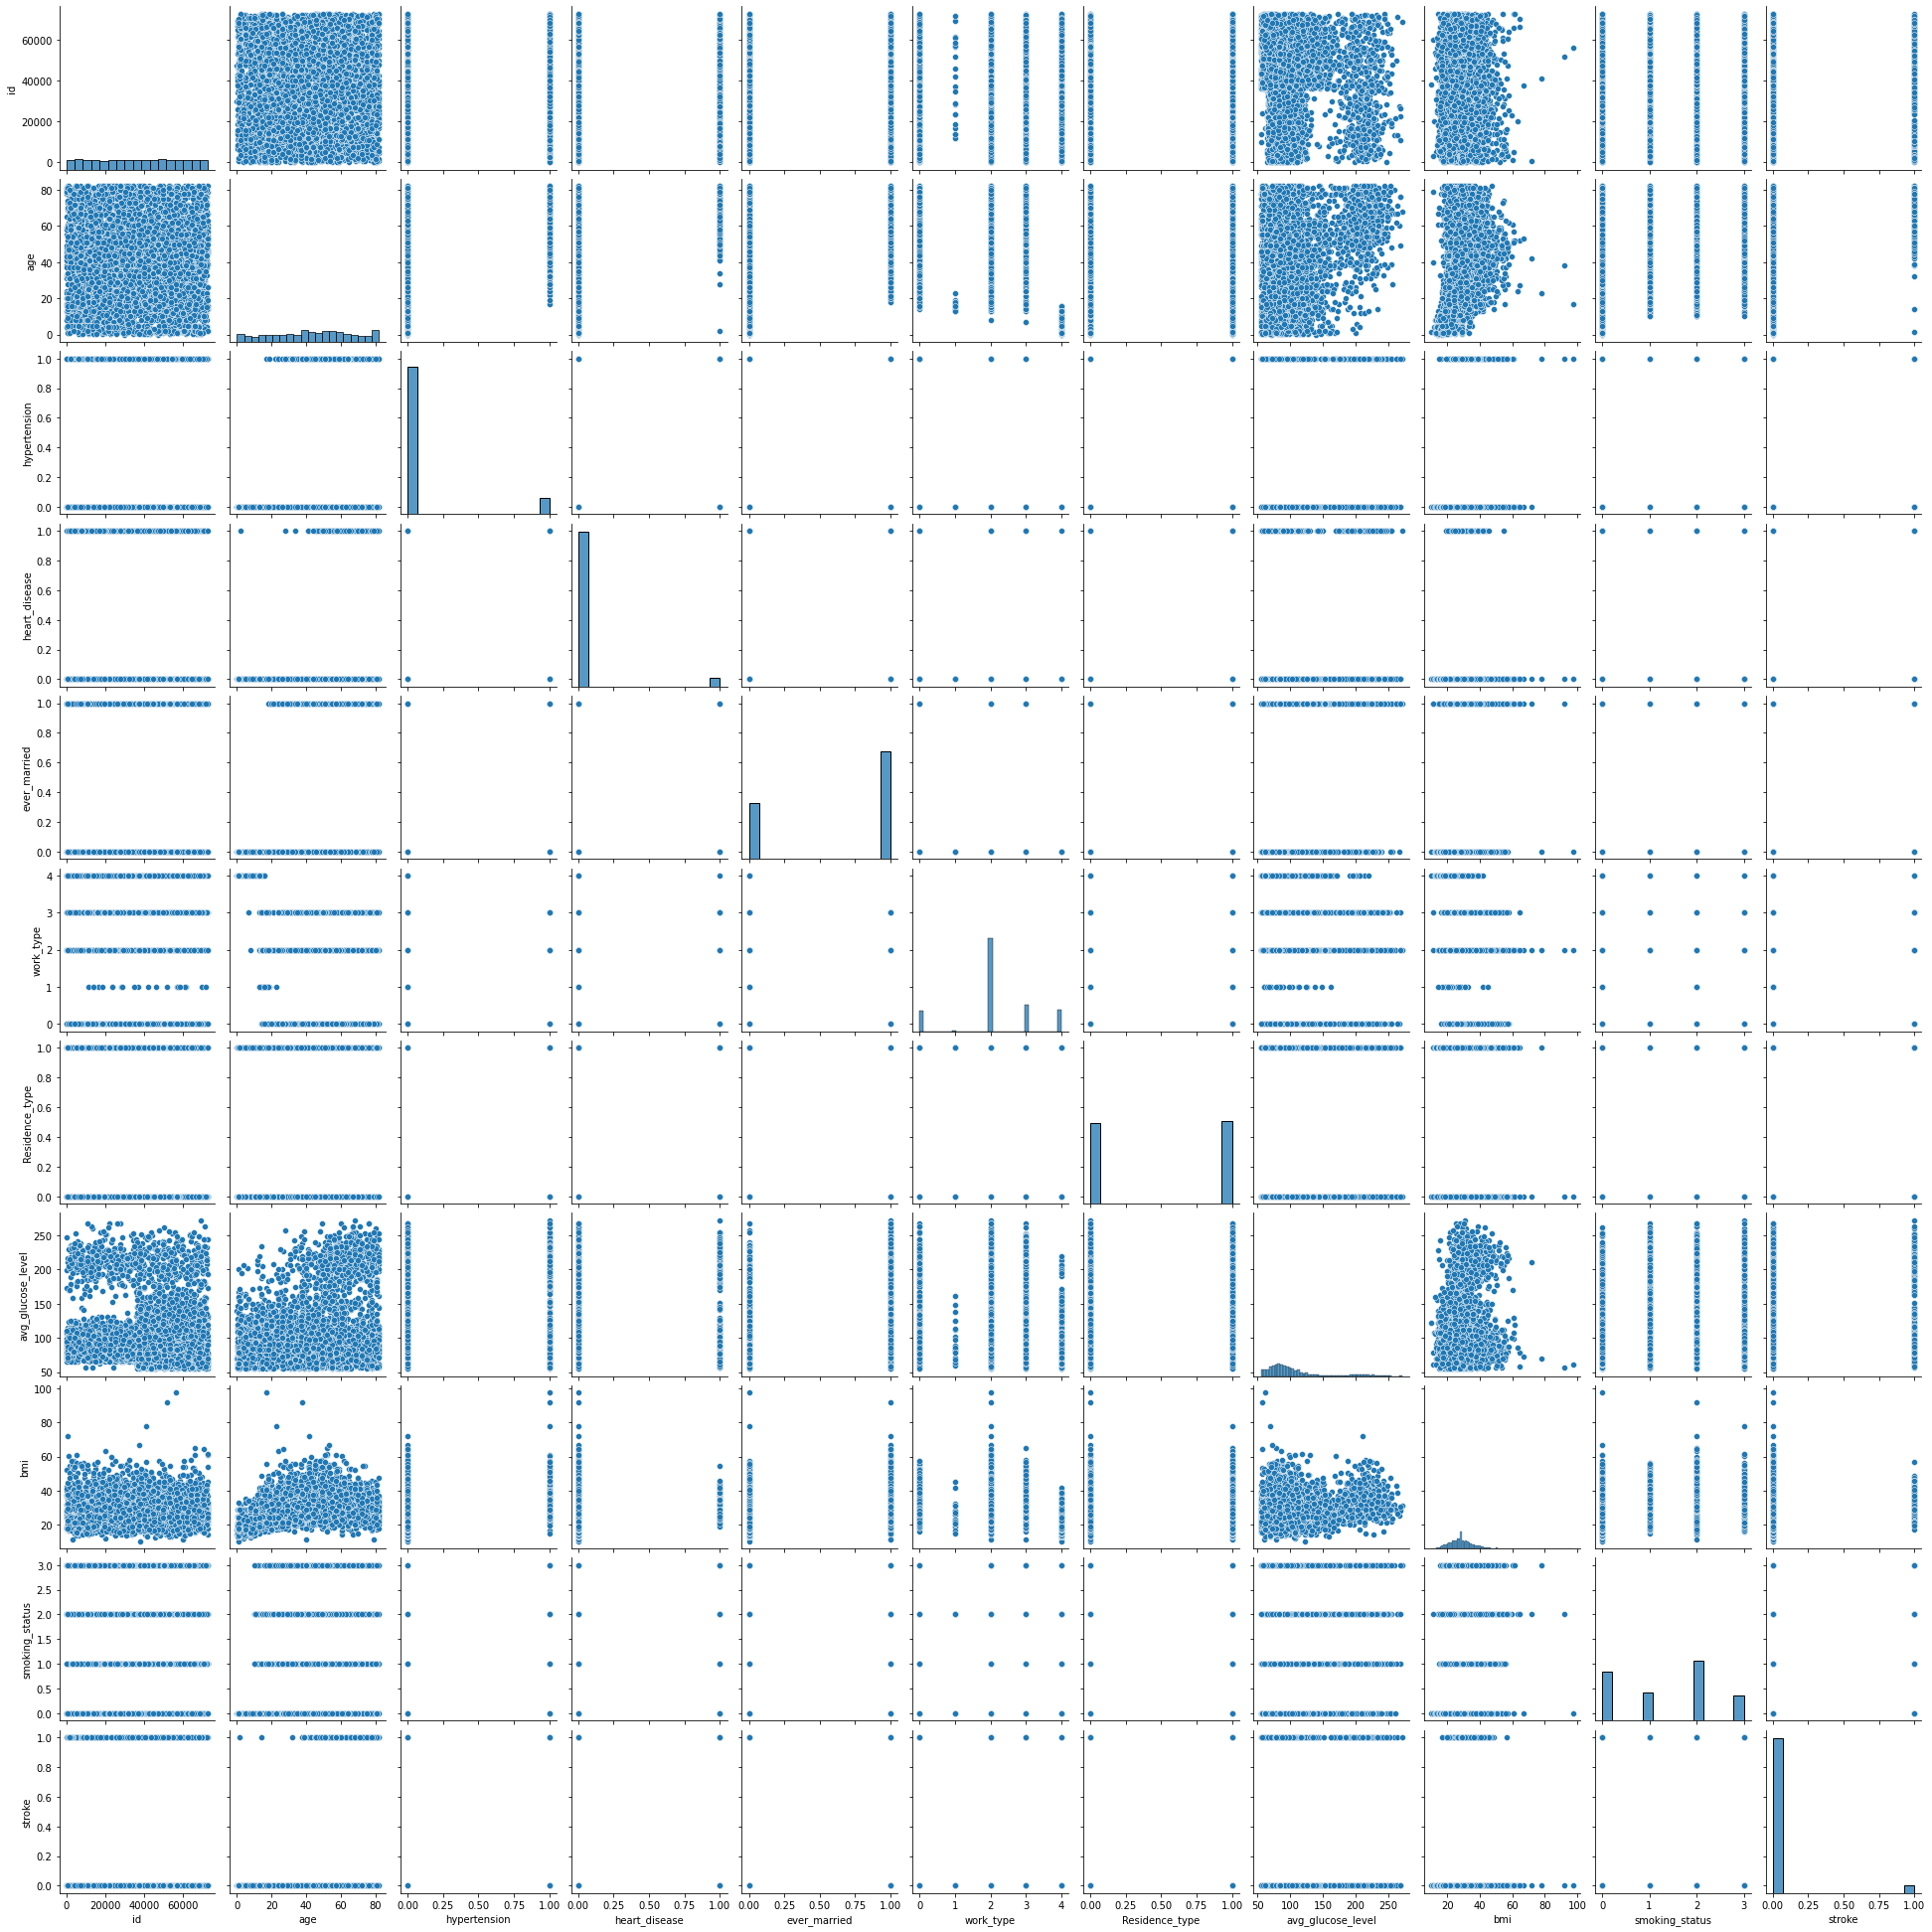

In [38]:
sns.pairplot(df2)

In [35]:
df2.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [53]:
df['bmi'] = df['bmi'].replace(np.nan, 29)

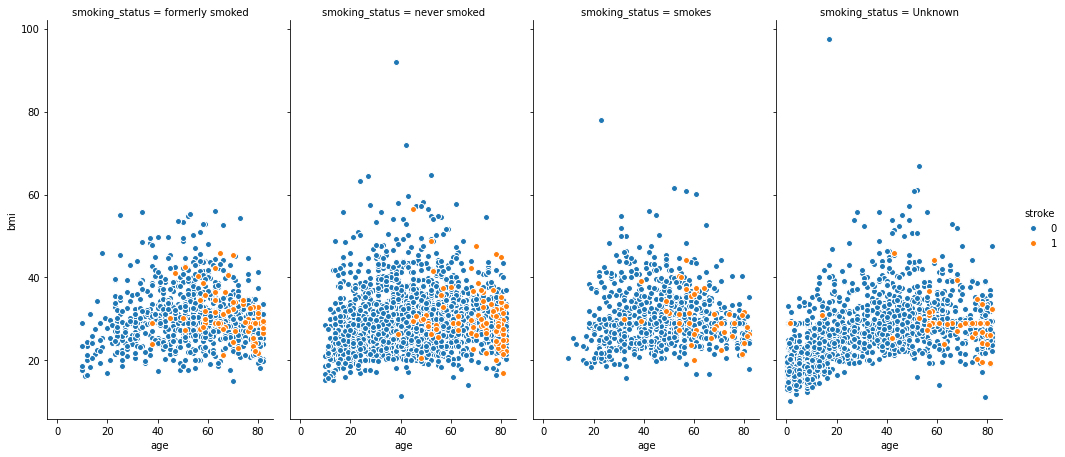

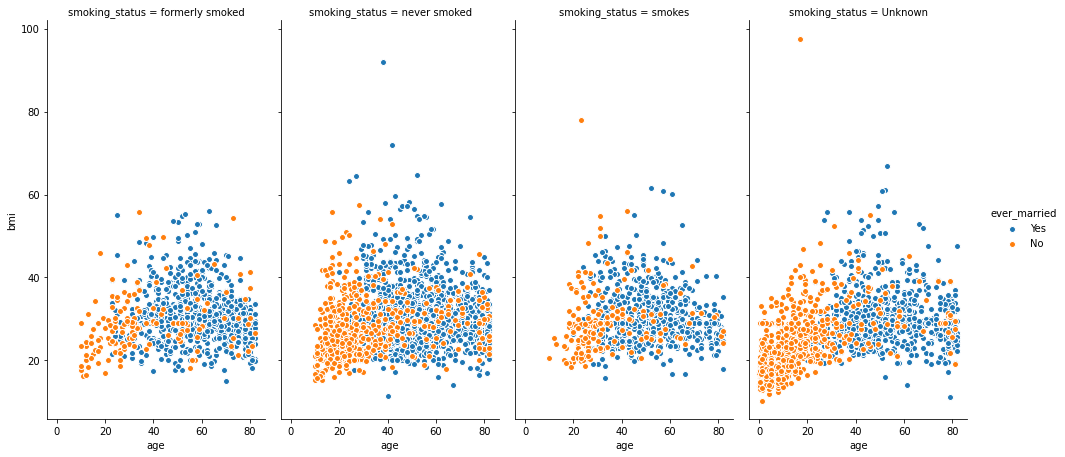

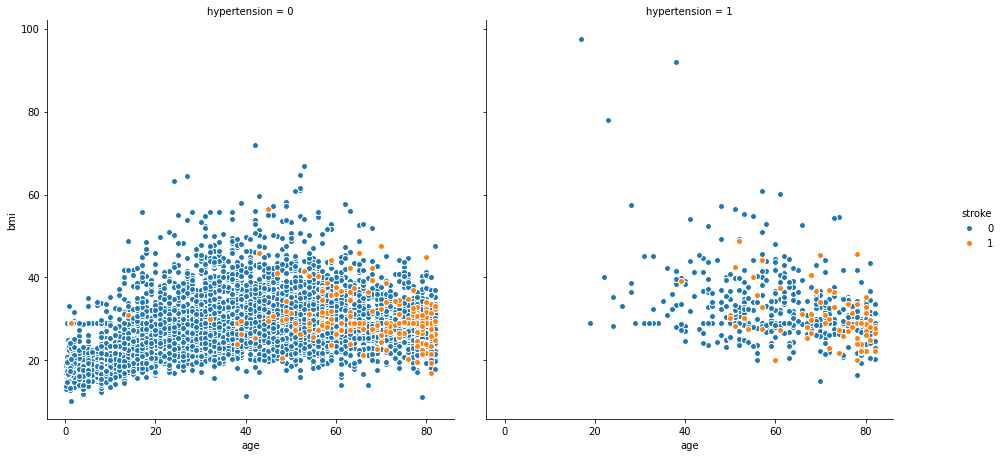

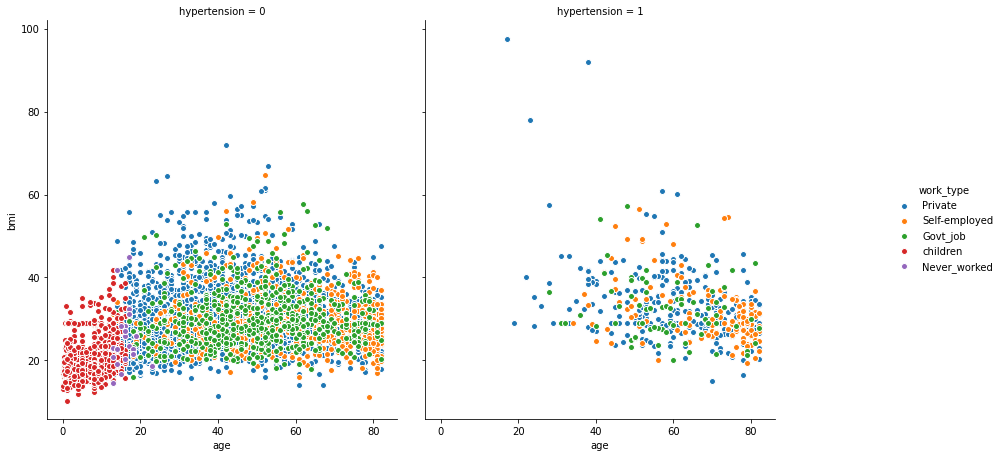

In [56]:
### Exploratory Data Analysis 

g = sns.FacetGrid(df, col="smoking_status",  hue="stroke")
g = (g.map(plt.scatter, "age", "bmi", edgecolor="w").add_legend())
g.fig.set_size_inches(15,8)
plt.show()

g = sns.FacetGrid(df, col="smoking_status",  hue="ever_married")
g = (g.map(plt.scatter, "age", "bmi", edgecolor="w").add_legend())
g.fig.set_size_inches(15,8)
plt.show()


g = sns.FacetGrid(df, col="hypertension",  hue="stroke")
g = (g.map(plt.scatter, "age", "bmi", edgecolor="w").add_legend())
g.fig.set_size_inches(15,8)
plt.show()

g = sns.FacetGrid(df, col="hypertension",  hue="work_type")
g = (g.map(plt.scatter, "age", "bmi", edgecolor="w").add_legend())
g.fig.set_size_inches(15,8)
plt.show()